Scrapping using beautifulsoup

<!DOCTYPE html>
<html lang="id"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>algoritma genetika - Penelusuran Google</title><script nonce="BMuID2rB60eqTfk_ioDU4g">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=win
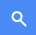

In [3]:

import requests
import bs4


text= "algoritma genetika"
url = 'https://google.com/search?q=' + text


request_result=requests.get( url )


soup = bs4.BeautifulSoup(request_result.text,"html.parser")
print(soup)


In [5]:
# soup.find.all( h3 ) to grab
# all major headings of our search result,
heading_object=soup.find_all( 'h3' )

# Iterate through the object
# and print it as a string.
for info in heading_object:
	print(info.getText())
	print("------")

[PDF] ALGORITMA GENETIKA
------
Algoritma Genetika dengan Python - BINUS Online
------
Algoritma genetik
------
[PDF] Algoritma Genetika
------
Algoritma genetik - Wikipedia bahasa Indonesia, ensiklopedia bebas
------
[PPT] ALGORITMA GENETIKA - Repository Unikom
------
Mengenal Lebih Dalam tentang Algoritma Genetika - Trivusi
------
[PDF] Penerapan Algoritma Genetika Untuk Penjadwalan Mata Pelajaran
------
[PDF] pemodelan algoritma genetika pada sistem penjadwalan ...
------
[PDF] Implementasi Algoritma Genetika untuk Penjadwalan Asisten Dosen ...
------
Algoritma Genetika Dalam Pemilihan Spesifikasi Komputer
------


In [49]:
from bs4 import BeautifulSoup
import os
import requests
import pandas as pd

def scrapweb(katakunci):
  hasil=[]
  url = 'https://google.com/search?q='+ katakunci
  request_result=requests.get( url )
  soup = bs4.BeautifulSoup(request_result.text,"html.parser")
  print(soup)
  heading_object=soup.find_all( 'h3' )
  for info in heading_object:
    hasil.append(info)
    print(info.getText())
    print("------")
  return hasil


def scrapJournal(theKeyword):
  keyword = theKeyword.replace(' ','%20')
  #URL="https://www.atlantis-press.com/search?q=universitas+negeri+surabaya"
  URL = "https://www.springeropen.com/search?searchType=publisherSearch&sort=PubDate&page=1&query="+keyword
  #page = urllib.request.urlopen(URL)
  page=requests.get( URL )
  soup = bs4.BeautifulSoup(page.text, "html.parser")
  listTitle = []
  listAuthor = []
  listDocument = []
  for link in soup.findAll('a'):
    if "data-test=" in str(link) and "title-link" in str(link) and " href=" in str(link):
      theTitle = link.string
      listTitle.append(theTitle)

    if "data-track=\"click\"" in str(link) and "pdf" in str(link):
      link = link.get('href')
      link = link.replace("""//""","")
      listDocument.append("""https://"""+link)

  for link in soup.findAll('p'):
    if "-listing__authors" in str(link):
      theAuthor = str(link).replace("</p>","")
      theAuthor = theAuthor.split("</span>")[1]
      listAuthor.append(theAuthor)

  data = {'Title': listTitle,
        'Author': listAuthor,
        'DocumentLink': listDocument}
  # df = pd.DataFrame(data)
  # return df.head()
  return data


scrapJournal('genetic algorithm')


{'Title': ['Accurate identification of cashmere and wool fibers based on enhanced ShuffleNetV2 and transfer learning',
  'A fuzzy TOPSIS method for surface integrity criteria ranking using the wire electrical discharge machining process',
  'In silico screening of non-synonymous SNPs in human TUFT1 gene',
  None,
  'Artificial intelligence in diagnosis and management of Huntington’s disease',
  'Role of serum survivin as a predictor of response to biological treatment in rheumatoid arthritis patients',
  None,
  'Abstracts of the 12th DACH+ Conference on Energy Informatics 2023',
  None,
  'Effects of fermented herbal tea residue on meat quality, rumen fermentation parameters and\xa0microbes of black goats',
  'Intrusion detection systems for wireless sensor networks using computational intelligence techniques',
  'Preparation, characterization, and biological activity of the inclusion complex of dihydroquercetin and β-Cyclodextrin',
  'Virtualized intelligent genetic load balancer for

Scraping Image

In [31]:
import os
import requests
from bs4 import BeautifulSoup

Google_scholar = 'https://scholar.google.com'

u_agnt = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
}

artikel_Folder = 'Images_1'

def main():
    if not os.path.exists(Image_Folder):
        os.mkdir(Image_Folder)
    download_images()

def download_images():
    data = input('Enter your search keyword: ')
    num_images = 500  # Mengunduh hingga 1000 gambar

    print(f'Searching Images for: {data}...')

    search_url = Google_Image + '&q=' + data

    response = requests.get(search_url, headers=u_agnt)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    html = response.text
    b_soup = BeautifulSoup(html, 'html.parser')
    results = b_soup.findAll('img', {'class': 'rg_i Q4LuWd'})

    count = 0
    imagelinks = []
    for res in results:
        try:
            link = res['data-src']
            imagelinks.append(link)
            count += 1
            if count >= num_images:
                break
        except KeyError:
            continue

    print(f'Found {len(imagelinks)} images')
    print('Start downloading...')

    for i, imagelink in enumerate(imagelinks):
        if i >= num_images:
            break

        response = requests.get(imagelink)

        imagename = os.path.join(Image_Folder, f'{data}_{i+1}.jpg')
        with open(imagename, 'wb') as file:
            file.write(response.content)

    print('Download Completed!')

if __name__ == '__main__':
    main()


NameError: name 'Image_Folder' is not defined

In [32]:
import os
import requests
from bs4 import BeautifulSoup

def search_and_print_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('h3', {'class': 'gs_rt'})

    if not results:
        print('No articles found.')
        return

    print('Articles found:')
    for i, result in enumerate(results):
        title = result.get_text()
        link = result.find('a')['href']
        print(f'{i + 1}. {title}')
        print(f'   Link: {link}')
        print()

if __name__ == '__main__':
    search_and_print_articles()


Articles found:
1. [BUKU][B] Perihal pemilu
   Link: https://polgov.fisipol.ugm.ac.id/wp-content/uploads/sites/1667/2022/02/perihal-pemilu.pdf

2. [PDF][PDF] Pemilu Indonesia
   Link: https://www.academia.edu/download/33692638/Pemilu_Indonesia_Fakta_Angka_Analisis_dan_Studi_Banding.pdf

3. [BUKU][B] Restorasi penyelenggaraan pemilu di Indonesia
   Link: https://books.google.com/books?hl=id&lr=&id=ryBxDwAAQBAJ&oi=fnd&pg=PP1&dq=pemilu&ots=iwg0V9dHh2&sig=kuFqZGMeAck3VcOZYrJanNNUPm8

4. Membongkar Dosa-dosa Pemilu
   Link: http://library.stik-ptik.ac.id/detail?id=5897&lokasi=lokal

5. Mengawasi Pemilu Mengawal Demokrasi
   Link: http://library.stik-ptik.ac.id/detail?id=4374&lokasi=lokal

6. [BUKU][B] Pemilu di Indonesia: Kelembagaan, Pelaksanaan, dan Pengawasan
   Link: https://books.google.com/books?hl=id&lr=&id=MI0mEAAAQBAJ&oi=fnd&pg=PR1&dq=pemilu&ots=74Z5F0wFuC&sig=XqEIZv_BbL7XeyipOkT2oKBnB6M

7. [BUKU][B] Penataan Demokrasi dan Pemilu di Indonesia
   Link: https://books.google.com/book

In [38]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

def search_and_save_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('div', {'class': 'gs_ri'})

    if not results:
        print('No articles found.')
        return

    article_data = {
        'Title': [],
        'Author': [],
        'Year': [],
        'Link': []
    }

    for i, result in enumerate(results):
        title_elem = result.find('h3', {'class': 'gs_rt'})
        author_elem = result.find('div', {'class': 'gs_a'})
        link_elem = result.find('a')

        if title_elem and author_elem and link_elem:
            title = title_elem.get_text()
            author_year_text = author_elem.get_text()
            link = link_elem.get('href')

            # Pemisahan author dan year dengan regex
            import re
            author_match = re.search(r'(?P<author>.*?) - (?P<year>\d{4})', author_year_text)
            if author_match:
                author = author_match.group('author')
                year = author_match.group('year')
            else:
                author = author_year_text
                year = ''

            article_data['Title'].append(title)
            article_data['Author'].append(author)
            article_data['Year'].append(year)
            article_data['Link'].append(link)

    df = pd.DataFrame(article_data)
    df.to_excel('articles.xlsx', index=False)
    print('Articles saved to articles.xlsx')

if __name__ == '__main__':
    search_and_save_articles()


Articles saved to articles.xlsx


In [1]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def search_and_save_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('div', {'class': 'gs_ri'})

    if not results:
        print('No articles found.')
        return

    article_data = {
        'Title': [],
        'Author': [],
        'Year': [],
        'Category': [],
        'Link': []
    }

    for i, result in enumerate(results):
        title_elem = result.find('h3', {'class': 'gs_rt'})
        author_elem = result.find('div', {'class': 'gs_a'})
        link_elem = result.find('a')

        if title_elem and author_elem and link_elem:
            title = title_elem.get_text()
            author_text = author_elem.get_text()
            link = link_elem.get('href')

            # Menggunakan ekspresi reguler untuk mencocokkan author, tahun, dan kategori
            match = re.search(r'^(.*?)(\d{4})(.*?)$', author_text)
            if match:
                author = match.group(1) + match.group(3)
                year = match.group(2)
            else:
                author = author_text
                year = ''

            article_data['Title'].append(title)
            article_data['Author'].append(author)
            article_data['Year'].append(year)
            
            # Mengambil kategori dari bagian "Author" ketika tidak ada tahun setelah tanda `-`
            if not year:
                category_match = re.search(r'[,]\s*-\s*(.+)$', author_text)
                category = category_match.group(1).strip() if category_match else ''
            else:
                category = ''
            article_data['Category'].append(category)
            
            article_data['Link'].append(link)

    df = pd.DataFrame(article_data)
    df.to_csv('articles.csv', index=False)
    print('Articles saved to articles.csv')

if __name__ == '__main__':
    search_and_save_articles()


Articles saved to articles.csv


In [29]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def search_and_save_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('div', {'class': 'gs_ri'})

    if not results:
        print('No articles found.')
        return

    article_data = {
        'Judul': [],
        'Author': [],
        'Tahun': [],
        'Nama Jurnal': [],
        'Link': []
    }

    for i, result in enumerate(results):
        title_elem = result.find('h3', {'class': 'gs_rt'})
        author_elem = result.find('div', {'class': 'gs_a'})
        link_elem = result.find('a')

        if title_elem and author_elem and link_elem:
            title = title_elem.get_text()
            author_text = author_elem.get_text()
            link = link_elem.get('href')

            # Menggunakan ekspresi reguler untuk mencocokkan author, tahun, dan kategori
            match = re.search(r'^(.*?)(?:\s*-?\s*(\d{4}))?(?:\s*-\s*(.*?))?\s*$', author_text)
            if match:
                author = match.group(1).strip()
                year = match.group(2)
                category = match.group(3).strip() if match.group(3) else ''

                # Cek apakah kategori mengandung empat digit angka
                year_match = re.search(r'\d{4}', category)
                if year_match:
                    # Jika ada empat digit angka dalam kategori, ambil sebagai tahun
                    year = year_match.group()

            article_data['Judul'].append(title)
            article_data['Author'].append(author)
            article_data['Tahun'].append(year)
            article_data['Nama Jurnal'].append(category)
            article_data['Link'].append(link)

    df = pd.DataFrame(article_data)
    df.to_csv('articlees.csv', index=False)
    print('Articles saved to articles.csv')

if __name__ == '__main__':
    search_and_save_articles()


Articles saved to articles.csv


In [36]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def search_and_save_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('div', {'class': 'gs_ri'})

    if not results:
        print('No articles found.')
        return

    article_data = {
        'No': [],
        'Judul': [],
        'Author': [],
        'Tahun': [],
        'Nama Jurnal': [],
        'Link': [],
        'Seminar': []
    }

    for i, result in enumerate(results):
        title_elem = result.find('h3', {'class': 'gs_rt'})
        author_elem = result.find('div', {'class': 'gs_a'})
        link_elem = result.find('a')

        if title_elem and author_elem and link_elem:
            title = title_elem.get_text()
            author_text = author_elem.get_text()
            link = link_elem.get('href')

            # Menggunakan ekspresi reguler untuk mencocokkan author, tahun, dan kategori
            match = re.search(r'^(.*?)(?:\s*-?\s*(\d{4}))?(?:\s*-\s*(.*?))?\s*$', author_text)
            if match:
                author = match.group(1).strip()
                year = match.group(2)
                category = match.group(3).strip() if match.group(3) else ''

                # Cek apakah artikel adalah prosiding berdasarkan tautan
                seminar = 'Prosiding' if 'proceedings' in link.lower() else 'Jurnal'

                # Cek apakah kategori mengandung empat digit angka
                year_match = re.search(r'\d{4}', category)
                if year_match:
                    # Jika ada empat digit angka dalam kategori, ambil sebagai tahun
                    year = year_match.group()
                    # Hapus tahun dari kategori
                    category = category.replace(year, '').strip()

            article_data['No'].append(i + 1)
            article_data['Judul'].append(title)
            article_data['Author'].append(author)
            article_data['Tahun'].append(year)
            article_data['Nama Jurnal'].append(category)
            article_data['Link'].append(link)
            article_data['Seminar'].append(seminar)

    df = pd.DataFrame(article_data)
    df.to_csv('articlees_no.csv', index=False)
    print('Articles saved to articles.csv')

if __name__ == '__main__':
    search_and_save_articles()


Articles saved to articles.csv


In [1]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def search_and_save_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('div', {'class': 'gs_ri'})

    if not results:
        print('No articles found.')
        return

    article_data = {
        'No': [],
        'Judul': [],
        'Author': [],
        'Tahun': [],
        'Nama Jurnal': [],
        'Link': [],
        'Seminar': [],
        'Proses Pencarian': []  # Kolom baru untuk menyimpan tema pencarian
    }

    for i, result in enumerate(results):
        title_elem = result.find('h3', {'class': 'gs_rt'})
        author_elem = result.find('div', {'class': 'gs_a'})
        link_elem = result.find('a')

        if title_elem and author_elem and link_elem:
            title = title_elem.get_text()
            author_text = author_elem.get_text()
            link = link_elem.get('href')

            # Menggunakan ekspresi reguler untuk mencocokkan author, tahun, dan kategori
            match = re.search(r'^(.*?)(?:\s*-?\s*(\d{4}))?(?:\s*-\s*(.*?))?\s*$', author_text)
            if match:
                author = match.group(1).strip()
                year = match.group(2)
                category = match.group(3).strip() if match.group(3) else ''

                # Cek apakah artikel adalah prosiding berdasarkan tautan atau kata kunci dalam judul atau tautan
                if 'proceedings' in link.lower() or 'conference' in title.lower() or 'symposium' in title.lower():
                    seminar = 'Prosiding'
                else:
                    seminar = 'Jurnal'

                # Cek apakah kategori mengandung empat digit angka
                year_match = re.search(r'\d{4}', category)
                if year_match:
                    # Jika ada empat digit angka dalam kategori, ambil sebagai tahun
                    year = year_match.group()
                    # Hapus tahun dari kategori
                    category = category.replace(year, '').strip()

            # Menyimpan tema pencarian dalam kolom "Proses Pencarian"
            article_data['Proses Pencarian'].append(data)

            article_data['No'].append(i + 1)
            article_data['Judul'].append(title)
            article_data['Author'].append(author)
            article_data['Tahun'].append(year)
            article_data['Nama Jurnal'].append(category)
            article_data['Link'].append(link)
            article_data['Seminar'].append(seminar)

    df = pd.DataFrame(article_data)
    df.to_csv('articlees_pro.csv', index=False)
    print('Articles saved to articles.csv')

if __name__ == '__main__':
    search_and_save_articles()


Articles saved to articles.csv


scrapping dengan type - prosiding

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def search_and_save_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('div', {'class': 'gs_ri'})

    if not results:
        print('No articles found.')
        return

    article_data = {
        'No': [],
        'Judul': [],
        'Author': [],
        'Tahun': [],
        'Nama Jurnal': [],
        'Link': [],
        'Type': [],
        'Proses Pencarian': []  # Kolom baru untuk menyimpan tema pencarian
    }

    for i, result in enumerate(results):
        title_elem = result.find('h3', {'class': 'gs_rt'})
        author_elem = result.find('div', {'class': 'gs_a'})
        link_elem = result.find('a')

        if title_elem and author_elem and link_elem:
            title = title_elem.get_text()
            author_text = author_elem.get_text()
            link = link_elem.get('href')

            # Menggunakan ekspresi reguler untuk mencocokkan author, tahun, dan kategori
            match = re.search(r'^(.*?)(?:\s*-?\s*(\d{4}))?(?:\s*-\s*(.*?))?\s*$', author_text)
            if match:
                author = match.group(1).strip()
                year = match.group(2)
                category = match.group(3).strip() if match.group(3) else ''

                # Cek apakah artikel adalah prosiding berdasarkan tautan atau kata kunci dalam judul atau tautan
                seminar = 'Prosiding' if 'proceedings' in link.lower() or 'conference' in title.lower() or 'symposium' in title.lower() else 'Jurnal'

                # Cek apakah kata "prosiding" muncul dalam nama jurnal
                if 'prosiding' in category.lower():
                    seminar = 'Prosiding'

                # Cek apakah kategori mengandung empat digit angka
                year_match = re.search(r'\d{4}', category)
                if year_match:
                    # Jika ada empat digit angka dalam kategori, ambil sebagai tahun
                    year = year_match.group()
                    # Hapus tahun dari kategori
                    category = category.replace(year, '').strip()

            # Menyimpan tema pencarian dalam kolom "Proses Pencarian"
            article_data['Proses Pencarian'].append(data)

            article_data['No'].append(i + 1)
            article_data['Judul'].append(title)
            article_data['Author'].append(author)
            article_data['Tahun'].append(year)
            article_data['Nama Jurnal'].append(category)
            article_data['Link'].append(link)
            article_data['Type'].append(seminar)

    df = pd.DataFrame(article_data)
    df.to_csv('articlees_pro1.csv', index=False)
    print('Articles saved to articles.csv')

if __name__ == '__main__':
    search_and_save_articles()


In [7]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

def search_and_save_articles():
    data = input('Enter your search keyword: ')

    url = f'https://scholar.google.com/scholar?q={data}'
    response = requests.get(url)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    soup = BeautifulSoup(response.text, "html.parser")

    results = soup.find_all('div', {'class': 'gs_ri'})

    if not results:
        print('No articles found.')
        return

    article_data = {
        'Title': [],
        'Author': [],
        'Year': [],
        'Link': []
    }

    for i, result in enumerate(results):
        title_elem = result.find('h3', {'class': 'gs_rt'})
        author_elem = result.find('div', {'class': 'gs_a'})
        link_elem = result.find('a')

        if title_elem and author_elem and link_elem:
            title = title_elem.get_text()
            author_year_text = author_elem.get_text()
            link = link_elem.get('href')

            # Pemisahan author dan year dengan regex
            import re
            author_match = re.search(r'(?P<author>.*?) - (?P<year>\d{4})', author_year_text)
            if author_match:
                author = author_match.group('author')
                year = author_match.group('year')
            else:
                author = author_year_text
                year = ''

            article_data['Title'].append(title)
            article_data['Author'].append(author)
            article_data['Year'].append(year)
            article_data['Link'].append(link)

    df = pd.DataFrame(article_data)
    df.to_excel('articles.xlsx', index=False)
    df.head()
    print('Articles saved to articles.xlsx')
    

if __name__ == '__main__':
    search_and_save_articles()


Articles saved to articles.xlsx


In [3]:
import os
import requests
from bs4 import BeautifulSoup

Google_Image = 'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990'

u_agnt = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
}

artikel_Folder = 'Images_1'  # Mengganti Image_Folder menjadi artikel_Folder

def main():
    if not os.path.exists(artikel_Folder):  # Mengganti Image_Folder menjadi artikel_Folder
        os.mkdir(artikel_Folder)  # Mengganti Image_Folder menjadi artikel_Folder
    download_images()

def download_images():
    data = input('Enter your search keyword: ')
    num_images = 500  # Mengunduh hingga 500 gambar

    print(f'Searching Images for: {data}...')

    search_url = Google_Image + '&q=' + data

    response = requests.get(search_url, headers=u_agnt)

    if response.status_code != 200:
        print('Failed to retrieve search results. Please check your internet connection.')
        return

    html = response.text
    b_soup = BeautifulSoup(html, 'html.parser')
    results = b_soup.findAll('img', {'class': 'rg_i Q4LuWd'})

    count = 0
    imagelinks = []
    for res in results:
        try:
            link = res['data-src']
            imagelinks.append(link)
            count += 1
            if count >= num_images:
                break
        except KeyError:
            continue

    print(f'Found {len(imagelinks)} images')
    print('Start downloading...')

    for i, imagelink in enumerate(imagelinks):
        if i >= num_images:
            break

        response = requests.get(imagelink)

        imagename = os.path.join(artikel_Folder, f'{data}_{i+1}.jpg')  # Mengganti Image_Folder menjadi artikel_Folder
        with open(imagename, 'wb') as file:
            file.write(response.content)

    print('Download Completed!')

if __name__ == '__main__':
    main()


Searching Images for: michelle ziudith...
Found 80 images
Start downloading...
Download Completed!
